In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=train.iloc[:,1:].values
X_test=test.iloc[:,1:].values
y=train['label'].values
y_test=test['label'].values
X[6,:].shape

(784,)

In [ ]:
image_size_px = int(np.sqrt(X.shape[1]))
print("The images size is (",image_size_px,'x',image_size_px,')')
def mnist_random_example():
    idx = np.random.randint(4156)
    exp = X[idx].reshape(image_size_px,image_size_px)
    print("idx:",idx," The number in the image below is:", y[idx])
    plt.imshow(exp)

The images size is ( 28 x 28 )


idx: 1452  The number in the image below is: 1


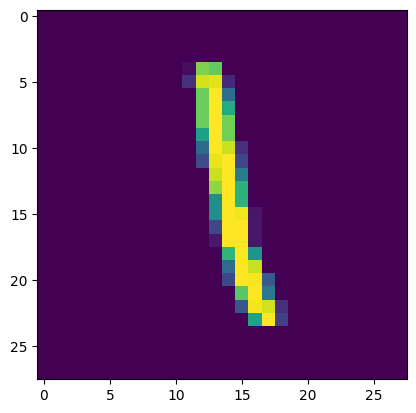

In [ ]:
mnist_random_example()

In [ ]:
def standerdize(data):
    mean = np.mean(data, axis=1, keepdims=True)
    std = np.std(data, axis=1, keepdims=True)
    data_standerdized = (data - mean)/std
    return data_standerdized

In [ ]:
X_stand=standerdize(X)
X_stand_test=standerdize(X_test)

In [ ]:
X.shape[0]

60000

In [ ]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [ ]:
# Define derivative of activation function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
# Define mean squared error (MSE) loss function
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

In [ ]:
# Define derivative of MSE loss function
def mse_loss_prime(y_pred, y_true):
    return 2 * (y_pred - y_true) / y_pred.shape[0]

In [ ]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy*100

In [ ]:
def one_hot(y):
  sampels=y.shape[0]
  label=set()

  for i in range(sampels):
    label.add(y[i])

  classes=len(label)
  new_y=np.zeros((sampels ,classes))
  for i in range(sampels):
    new_y[i,y[i]]=1
  
  return new_y,classes

In [ ]:
def soft_max(z):
  n_sampels,n_classes=z.shape
  new_z=np.zeros((n_sampels,n_classes))
  for i in range(n_sampels):
    sum=0
    for j in range(n_classes):
      sum+=np.exp(z[i,j])
    for j in range(n_classes):
      new_z[i,j]=np.exp(z[i,j])/sum

  return new_z

In [ ]:
def L_def(y_hat,y_hot):
  
  l=np.mean(y_hat-y_hot)
  return l

In [ ]:
def act_def(z):
  
  d=z*(1-z)
  return d


In [ ]:
def mrg_classes_of_y (y_soft):
  num_of_samples,num_classes = y_soft.shape
  y_pred=np.zeros(num_of_samples)
  for i in range(num_of_samples):
    max_value = np.max(y_soft[i])
    index = 0
    for ii in range(num_classes):
      if(max_value == y_soft[i][ii]):
        index = ii
    y_pred[i]= index
  return y_pred

In [ ]:
class L:
  def __init__(self, derc1, derc2):
        
        self.W = np.random.randn(derc1, derc2)
        np.random.seed(0)

        self.B = np.zeros((1, derc2))

  def calculate_Z(self,X):
    self.Z = np.dot(X, self.W) + self.B
    self.A = sigmoid(self.Z)
    return self.A



  def update(self,dw,db,lr=0.001):
    
    self.W = self.W - lr * dw
    self.B = self.B - lr * db

In [ ]:
class NN :
  def __init__(self,x, y ,num_of_layers, size_of_layer, epochs = 100 , learning_rate = 0.001):
    self.num_of_layers = num_of_layers +1
    self.input_size = x.shape[1]
    self.hidden_size = size_of_layer

    self.y_one_hot , self.num_of_classes= one_hot(y)
    self.output_size = self.num_of_classes

    self.layers = np.empty(self.num_of_layers, dtype=object)
    

    for i in range(self.num_of_layers):
      if (i == 0):
        self.layers[i] = L(self.input_size,self.hidden_size[i])
      elif (i == self.num_of_layers-1):
        self.layers[i] = L(self.hidden_size[i-1],self.output_size)
      else:
        self.layers[i] = L(self.hidden_size[i-1],self.hidden_size[i])

    for epoch in range(epochs):

      for i in range(self.num_of_layers):
        if (i == 0):
          A = self.layers[i].calculate_Z(x)
        else:
          A = self.layers[i].calculate_Z(A)

      
      if epoch != epochs-1:
          for i in range(self.num_of_layers):
            position = self.num_of_layers-1-i
            if position == self.num_of_layers-1:

              
              sub_up =  mse_loss_prime(self.layers[position].A , self.y_one_hot)
              dw= np.dot(np.transpose( self.layers[position-1].A ), sub_up)
              db=np.sum(sub_up, axis=0)
            
              self.layers[position].update(dw,db,learning_rate)
             
            elif position == 0:
              sub_up= np.dot(sub_up , np.transpose(self.layers[position+1].W)) * sigmoid_prime(self.layers[position].Z)
              dw= np.dot(np.transpose(X), sub_up)
              db = np.sum(sub_up, axis=0)

              self.layers[position].update(dw,db,learning_rate)
             
            else:              
              sub_up= np.dot( sub_up, np.transpose(self.layers[position+1].W) ) * sigmoid_prime(self.layers[position].Z)
              dw = np.dot(np.transpose(self.layers[position-1].A), sub_up)
              db = np.sum(sub_up, axis=0)

              self.layers[position].update(dw,db,learning_rate)
             

  def test (self,x_test,y_test):
    for i in range(self.num_of_layers):
      if (i == 0):
        A = self.layers[i].calculate_Z(x_test)
        
      else:
        A = self.layers[i].calculate_Z(A)
        
    a = soft_max(A)
    y_pred = mrg_classes_of_y(a)

    print("y_pred",y_pred)
    print("y_test",y_test)
    print(accuracy(y_test,y_pred))

In [ ]:
n= NN(X,y,2,[20,10],10000,0.1)
n.test(X_test,y_test)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_17140\4144518951.py:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [7. 2. 1. ... 4. 8. 6.]
y_test [7 2 1 ... 4 5 6]
79.25999999999999


In [ ]:
n= NN(X,y,2,[20,10],20000,0.1)
n.test(X_test,y_test)

<ipython-input-36-dbf66acad5bd>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))
y_pred [7. 2. 1. ... 4. 4. 6.]
y_test [7 2 1 ... 4 5 6]
91.256145509


In [ ]:
n= NN(X,y,3,[20,10,20],1000,0.1)
n.test(X_test,y_test)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_17140\4144518951.py:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [7. 5. 1. ... 7. 5. 6.]
y_test [7 2 1 ... 4 5 6]
57.37


In [ ]:
n= NN(X,y,3,[10,20,20],1000,0.1)
n.test(X_test,y_test)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_17140\4144518951.py:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [7. 2. 1. ... 4. 4. 6.]
y_test [7 2 1 ... 4 5 6]
54.64


In [ ]:
n= NN(X,y,3,[10,20,10],1000,0.1)
n.test(X_test,y_test)

<ipython-input-36-dbf66acad5bd>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))
y_pred [7. 2. 1. ... 4. 4. 6.]
y_test [7 2 1 ... 4 5 6]
54.64


In [ ]:
n= NN(X,y,3,[20,20,10],1000,0.1)
n.test(X_test,y_test)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_23676\4144518951.py:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [7. 6. 1. ... 7. 7. 6.]
y_test [7 2 1 ... 4 5 6]
51.27


In [ ]:
n= NN(X,y,2,[20,10],1000,1)
n.test(X_test,y_test)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_23676\4144518951.py:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [7. 2. 1. ... 4. 2. 6.]
y_test [7 2 1 ... 4 5 6]
77.16


In [ ]:
n= NN(X,y,3,[10,20,10],1500,1)
n.test(X_test,y_test)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_23676\4144518951.py:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [7. 6. 1. ... 9. 8. 6.]
y_test [7 2 1 ... 4 5 6]
58.709999999999994


In [ ]:
n= NN(X,y,7,[10,20,10,15,14,15,13],2000,0.1)
n.test(X_test,y_test)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_23676\4144518951.py:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [1. 1. 1. ... 1. 1. 1.]
y_test [7 2 1 ... 4 5 6]
11.35


In [ ]:
n= NN(X,y,5,[20,40,20,30,10],5,0.1)
n.test(X_test,y_test)

<ipython-input-10-dbf66acad5bd>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [4. 7. 7. ... 4. 7. 4.]
y_test [7 2 1 ... 4 5 6]
8.27


In [ ]:
n= NN(X,y,5,[20,40,20,30,10],50,0.1)
n.test(X_test,y_test)

<ipython-input-10-dbf66acad5bd>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [1. 7. 3. ... 4. 4. 1.]
y_test [7 2 1 ... 4 5 6]
11.24


In [ ]:
n= NN(X,y,5,[20,40,20,30,10],100,0.1)
n.test(X_test,y_test)

<ipython-input-10-dbf66acad5bd>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [1. 7. 3. ... 4. 9. 1.]
y_test [7 2 1 ... 4 5 6]
15.76


In [ ]:
n= NN(X,y,5,[20,40,20,30,10],200,0.1)
n.test(X_test,y_test)

<ipython-input-10-dbf66acad5bd>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))


y_pred [7. 0. 3. ... 4. 7. 7.]
y_test [7 2 1 ... 4 5 6]
20.979999999999997


In [25]:
n= NN(X,y,5,[20,40,20,30,10],2500,1)
n.test(X_test,y_test)

<ipython-input-36-dbf66acad5bd>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))
y_pred [7. 3. 1. ... 4. 5. 6.]
y_test [7 2 1 ... 4 5 6]
61.927144593


In [ ]:
n= NN(X,y,5,[20,40,20,30,10],3500,1)
n.test(X_test,y_test)

<ipython-input-36-dbf66acad5bd>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))
y_pred [7. 3. 1. ... 4. 5. 6.]
y_test [7 2 1 ... 4 5 6]
72.566665899


In [24]:
n= NN(X,y,2,[10,10],500,0.1)
n.test(X_test,y_test)

<ipython-input-36-dbf66acad5bd>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-z)))
y_pred [7. 3. 1. ... 4. 5. 6.]
y_test [7 2 1 ... 4 5 6]
27.0903755
